In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

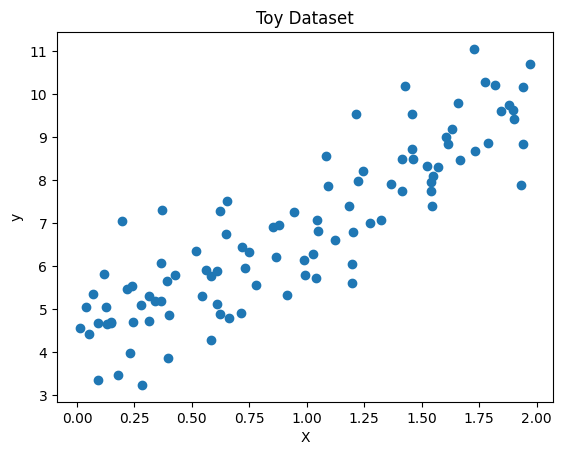

In [5]:
# Create a toy dataset
np.random.seed (42)
X = 2 * np.random.rand(100 , 1)
y = 4 + 3 * X + np.random.randn (100 , 1)
# Visualize the dataset
plt.scatter (X , y )
plt.xlabel ("X")
plt.ylabel ("y")
plt.title ("Toy Dataset")
plt.show ()

 Ordinary Least Squares (OLS) Regression

In [6]:
# Performing OLS in Python
X_b = np . c_ [ np.ones ((100 , 1) ) , X ] # add x0 = 1 to each instance
theta_best = np.linalg.inv ( X_b . T @ X_b ) @ X_b . T @ y

print ( f" Optimal parameters : {theta_best.ravel ()}")

 Optimal parameters : [4.21509616 2.77011339]


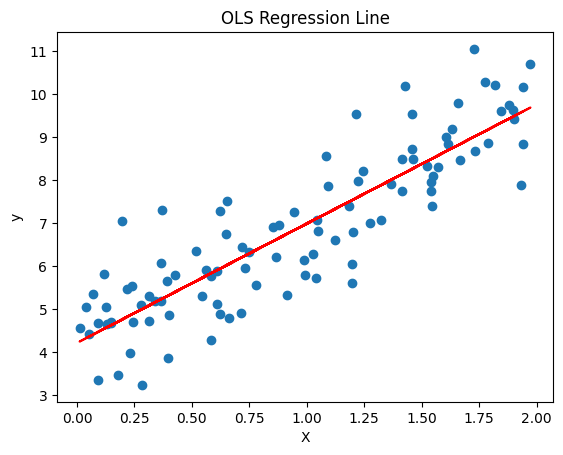

In [7]:
# Visualize OLS Results
plt.scatter(X,y)
plt.plot(X, X_b @ theta_best, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS Regression Line")
plt.show()

Single Neurone Neural Network  - Training Approach and Loss Function


In [8]:
# Visualize the Loss Function in 3D
weight_range = np.linspace(0,6,100)
bias_range = np.linspace ( -2 , 6 , 100)
weights , biases = np.meshgrid ( weight_range , bias_range )

#Initialize a matrix to hold the loss values
loss_values = np.zeros(weights.shape)

# Compute the loss for each combination of weight and bias
for i in range ( weights.shape [0]):
  for j in range(weights.shape[1]):
    y_pred = weights[i,j] * X + biases[i,j]
    loss_values[i,j] = np.mean((y - y_pred) **2)

# Create an interactive 3D plot using plotly
fig = go.Figure( data =[ go.Surface ( z = loss_values , x = weight_range , y = bias_range
) ])
fig.update_layout(title='Loss Surface for Single Neuron Model',scene = dict (xaxis_title = 'Weight', yaxis_title='Bias',zaxis_title='Loss'))
fig.show()


Training the Neural Network ---
Implementing Gradient Descent from Scratch

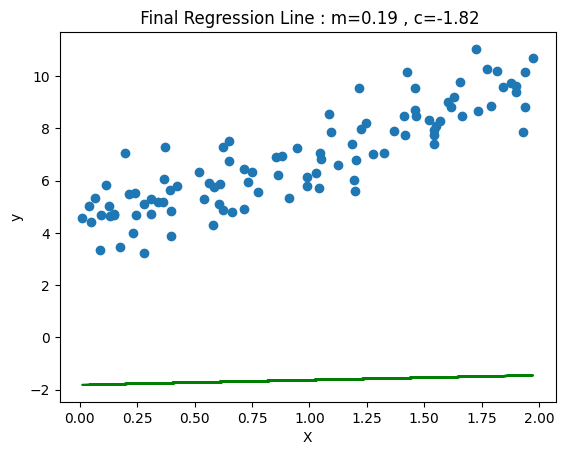

In [9]:
# Initial parameters
m = 0 # initial weight
c = -2 # initial bias
learning_rate = 0.01
epochs = 100

# Store parameters for plotting
m_values = []
c_values = []
loss_history = []

# Gradient Descent
N = len( X ) # number of data points
for epoch in range ( epochs ) :
# Forward pass : compute predictions
  y_pred = m * X + c
  loss = np . mean (( y - y_pred ) **2)

 # Store parameters and loss
  m_values . append ( m )
  c_values . append ( c )
  loss_history . append ( loss )

 # Compute gradients
m_gradient = -2 * np . mean ( X * ( y - y_pred ) )
c_gradient = -2 * np . mean ( y - y_pred )

 # Update parameters
m -= learning_rate * m_gradient
c -= learning_rate * c_gradient

# Plot the parameters on the 3D loss surface
scatter = go . Scatter3d( x = m_values , y = c_values , z = loss_history , mode ='lines + markers',
marker = dict(size =5 , color ='red ') , name ='Optimization Path')
fig.add_trace ( scatter )
fig.show ()

# Plot the final regression line
plt.scatter (X , y )
plt.plot (X , m * X + c , color ='green')
plt.xlabel ("X")
plt.ylabel ("y")
plt.title ( f" Final Regression Line : m={m:.2f} , c={c:.2f}")
plt.show ()